In [1]:
# analisis exploratorio de los datos

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
#cargar datos 
archivo = pd.read_csv('Titanic-Dataset.csv')
archivo.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
archivo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

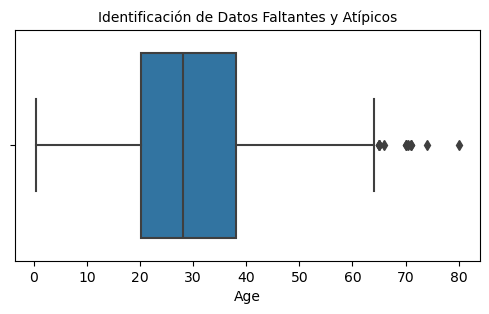

In [9]:
#cargar graficas con datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


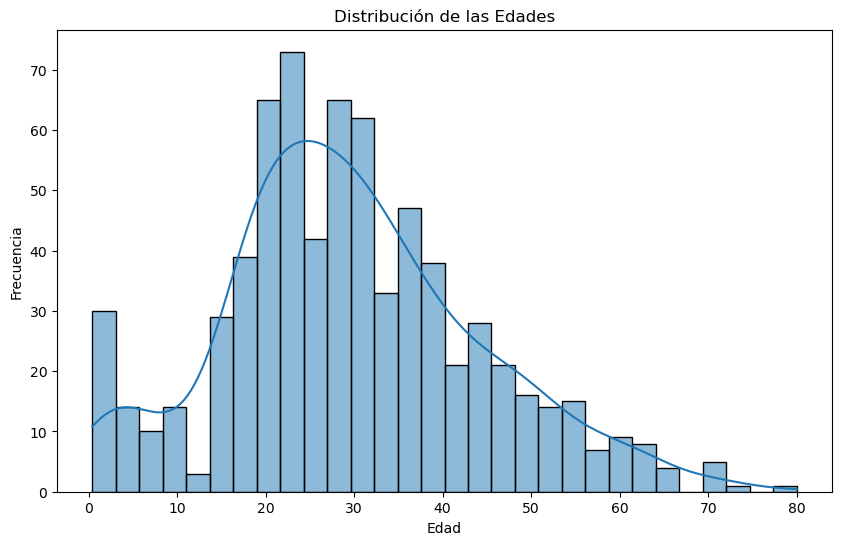

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de las Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

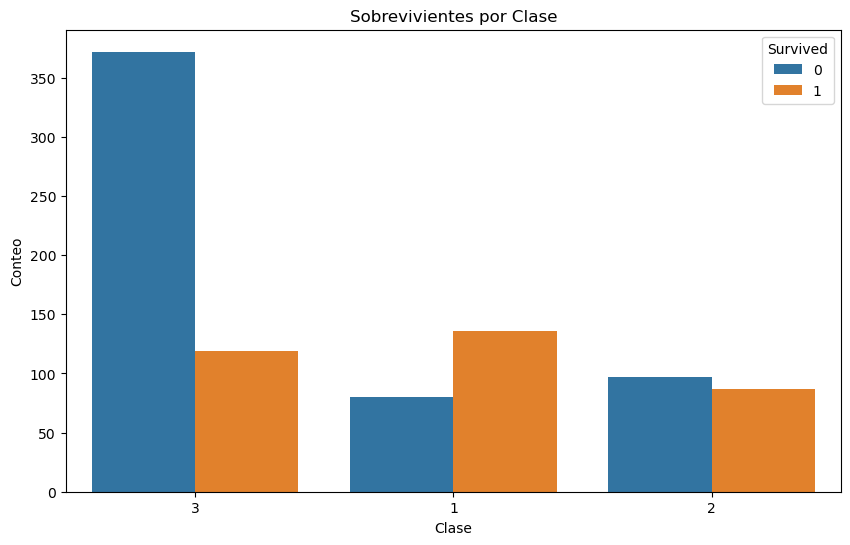

In [14]:
# Conteo de sobrevivientes por clase
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Sobrevivientes por Clase')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

In [15]:
# Llenar los valores nulos en 'Age' con la mediana de las edades
df['Age'].fillna(df['Age'].median(), inplace=True)

# Llenar los valores nulos en 'Embarked' con el modo
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Llenar los valores nulos en 'Fare' con la mediana
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Convertir variables categóricas en variables dummy (One-hot encoding)
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Eliminar columnas innecesarias
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Verificar nuevamente la ausencia de valores nulos
print(df.isnull().sum())

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [42]:
X_encoded = pd.get_dummies(X)

In [44]:
# Seleccionar las características más relevantes del modelo
selected_features = ['Pclass', 'Sex_male', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']

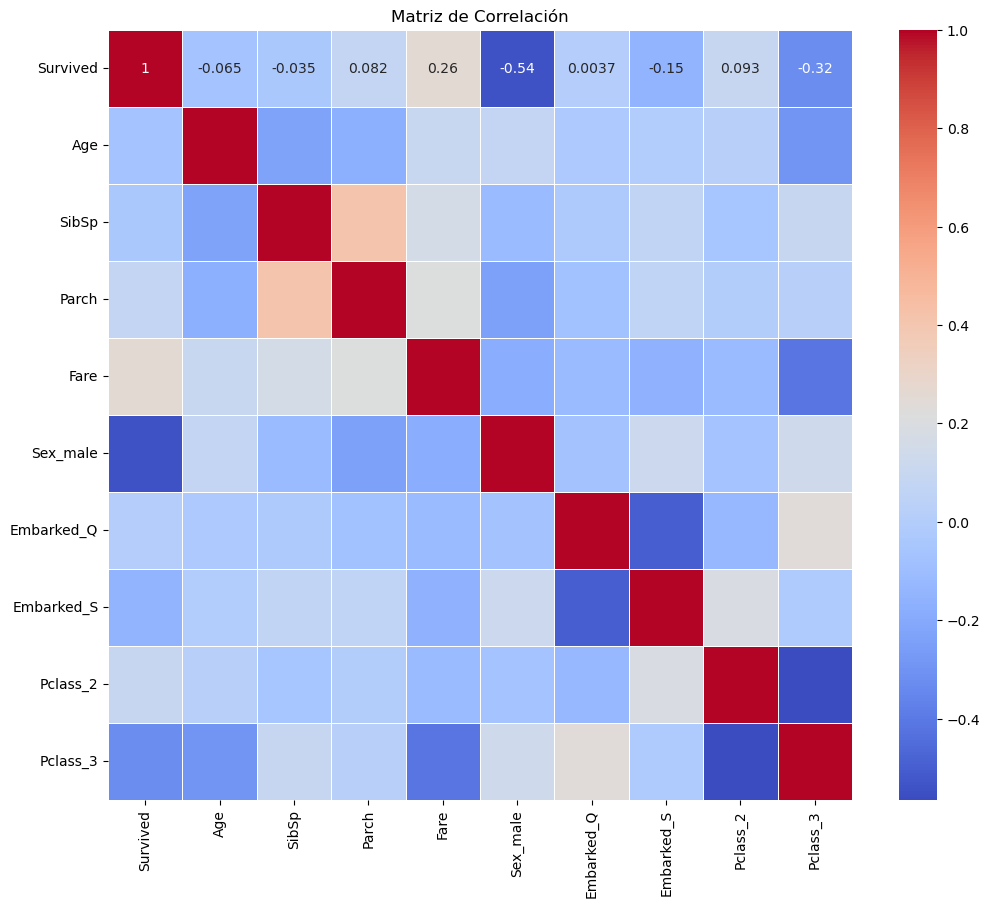

In [17]:
# Mostrar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Seleccionar las características más relevantes
features = ['Age', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

In [39]:
# Dividir el dataset en Train y Test para evaluar correctamente el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística
model = LogisticRegression(max_iter=200)

# Entrenar el modelo
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [25]:
# predicciones
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import mean_squared_error

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print(f'Error cuadrático medio: {mse}')
print(f'Coeficiente de determinación R^2: {r2}')

Error cuadrático medio: 0.20670391061452514
Coeficiente de determinación R^2: 0.14761904761904754


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7932960893854749
Precision: 0.7681159420289855
Recall: 0.7162162162162162
F1 Score: 0.7412587412587412


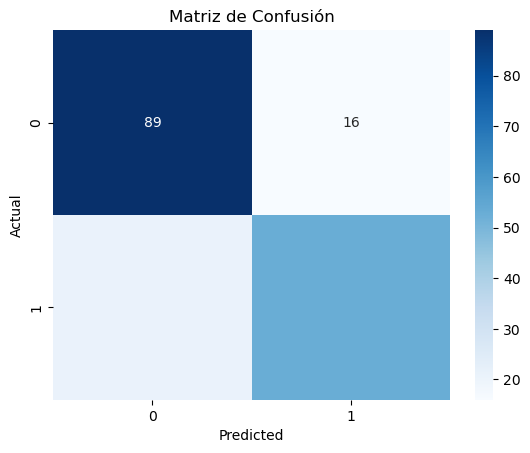

In [32]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

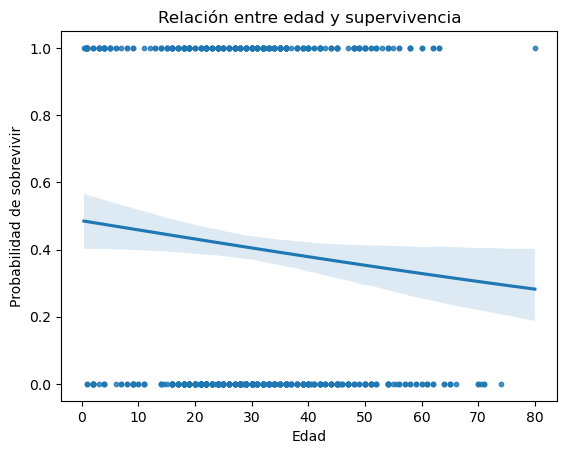

In [33]:
titanic = sns.load_dataset('titanic')

# Gráfico de dispersión de edad vs. supervivencia
sns.regplot(x="age", y="survived", data=titanic, logistic=True, scatter_kws={"s": 10})
plt.title("Relación entre edad y supervivencia")
plt.xlabel("Edad")
plt.ylabel("Probabilidad de sobrevivir")
plt.show()

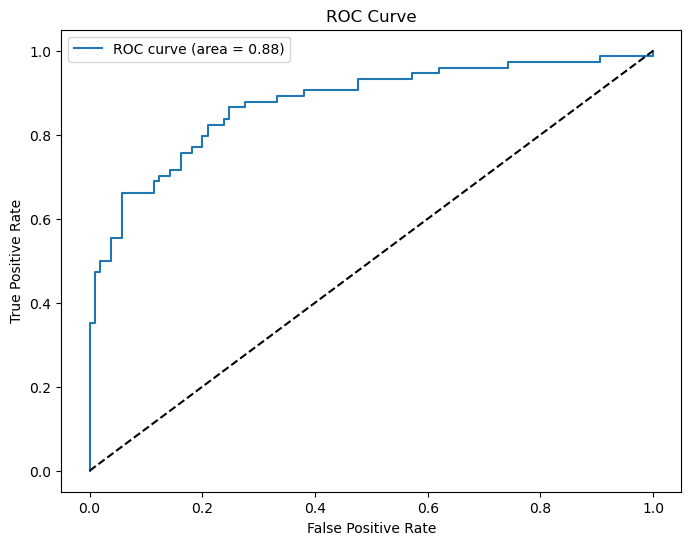

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
